In [15]:
#from google.colab import drive
#drive.mount('/content/drive')



In [16]:
import os
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
pd.set_option('display.max_columns', None)

In [18]:
parent_dir = os.getcwd()
print(parent_dir)

d:\Quantify Natural Behavior Course\Python Test


# **Supervised Learning with Existing Features**

## Assumptions:

1.   Clean data: no wrong inputs / NaN/outliers/interpolations
2.   Data has meaningful features
3.   Data has been set up in a convenient structure to apply machine learning model.
4.   Data is from a balanced set










## Machine Learning structures

1. Training set
2. Testing set
3. Both training and testing sets have the same number columns














In [19]:
from PIL import Image

d:\Quantify Natural Behavior Course\Python Test\images_for_model_with_features\example_matrix.jpeg


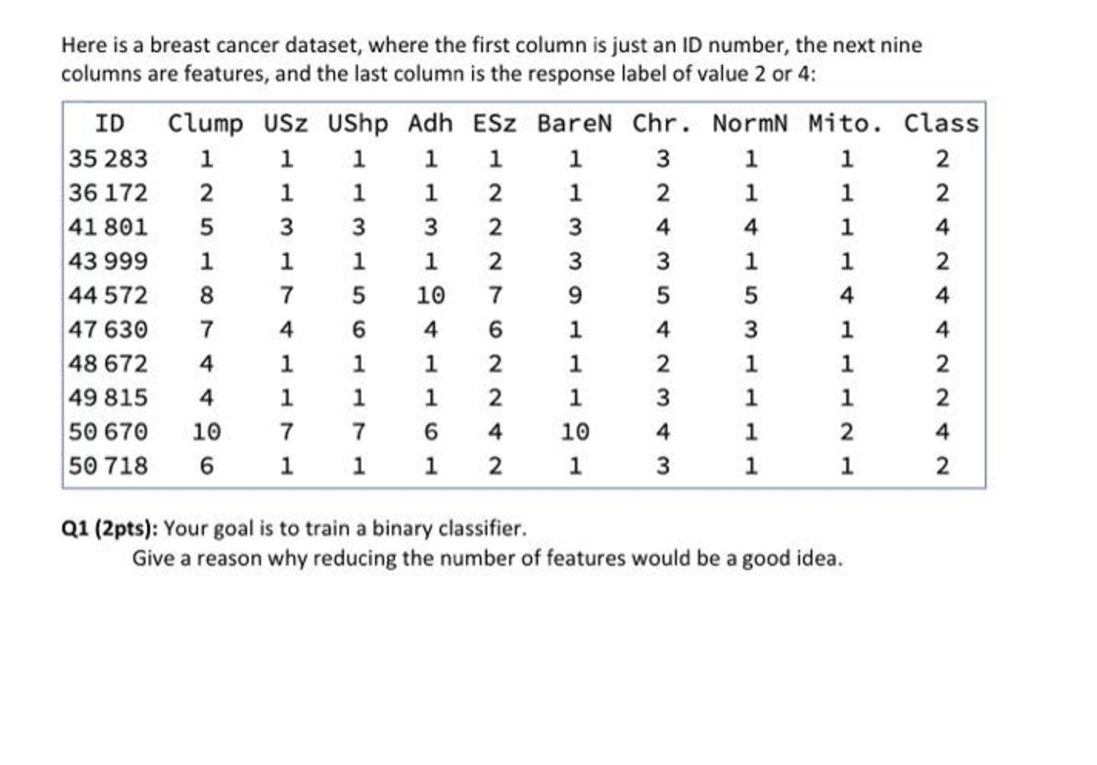

In [20]:
image_path = parent_dir + '\images_for_model_with_features\example_matrix.jpeg'
print(image_path)

# Open the image
img = Image.open(image_path)


# Double the size of the image
new_size = (img.width * 2, img.height * 2)
img_resized = img.resize(new_size)

# Adjust the figure size in matplotlib
plt.figure(figsize=(new_size[0] / 100, new_size[1] / 100))  # Adjust this value to control size
plt.imshow(img_resized)
plt.axis('off')  # Hide axes
plt.show()


In [21]:
file_path = parent_dir + '/data_for_model_with_features/Iris.csv'
df = pd.read_csv(file_path,index_col=0)
display(df.sample(n=6,random_state=1003))

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
7,4.6,3.4,1.4,0.3,Iris-setosa
142,6.9,3.1,5.1,2.3,Iris-virginica
2,4.9,3.0,1.4,0.2,Iris-setosa
130,7.2,3.0,5.8,1.6,Iris-virginica
29,5.2,3.4,1.4,0.2,Iris-setosa
73,6.3,2.5,4.9,1.5,Iris-versicolor


## Our Data



In [22]:
file_path = parent_dir + '/data_for_model_with_features/training_with_features.csv'
training_set = pd.read_csv(file_path,index_col=0)
display(training_set.sample(n=6,random_state=1003))
print('')
print("shape of matrix")
print(training_set.shape)

,arcThetaL,arcThetaR,fFA,fFV,fLA,fLS,fLV,fRS,fmAng,fmFV,fmLS,mFA,mFV,mLA,mLS,mLV,mRS,mfAng,mfDist,mfFV,mfLS,wingFL,wingFR,wingML,wingMR,label
15880,79.929008,36.524356,0.027383,-0.014983,0.005955,0.009187,0.009187,0.0,155.797188,0.009899,0.014522,-0.113368,0.033948,0.238253,0.144755,-0.144755,-0.0,-8.109614,101.340953,0.013167,0.148098,2.306864,2.708944,7.229157,67.385178,1
15856,82.033382,92.254952,-0.001279,0.022185,-0.050519,0.040129,0.040129,0.0,-20.511807,0.034838,0.029813,0.158421,-0.020516,-0.046449,0.011705,-0.011705,-0.0,19.541408,116.162325,-0.015421,0.017892,1.564319,4.415898,4.156145,3.396722,1
107,73.816560,99.195637,-0.016033,0.066774,0.000393,0.008698,-0.008698,-0.0,-25.001056,0.056844,0.036098,-0.215455,0.113949,-0.022607,0.030063,0.030063,-0.0,32.285182,164.524853,0.080272,0.086282,4.178695,1.590141,1.030650,7.374231,0
5166,48.233998,124.859410,-0.147311,0.070882,0.074903,0.030919,-0.030919,-0.0,-21.565185,0.054563,0.054801,0.124149,-0.067486,-0.011839,0.009148,0.009148,0.0,78.638418,115.156795,-0.022265,0.064361,-0.734537,6.935625,3.840573,5.282649,0
3889,145.771363,46.771384,-0.024323,0.025395,0.071910,0.023251,-0.023251,0.0,13.194705,0.030032,0.016841,0.028891,0.015090,0.024093,0.012468,0.012468,0.0,-162.940379,106.315778,-0.010766,0.016348,4.258150,4.648148,8.059078,1.172142,0
12235,2.989691,178.396548,0.325953,-0.039201,0.630119,0.376086,-0.376086,-0.0,-142.138810,-0.199878,0.320977,-0.002668,0.013098,-0.000848,0.014514,-0.014514,-0.0,107.265505,374.535858,0.009973,0.016816,5.023508,-0.826572,-1.711401,6.318739,1



shape of matrix
(16000, 26)


In [23]:
file_path = parent_dir + '/data_for_model_with_features/testing_with_features.csv'
testing_set = pd.read_csv(file_path,index_col=0)
display(testing_set.sample(n=6,random_state=1003))
print('')
print("shape of matrix")
print(testing_set.shape)

,arcThetaL,arcThetaR,fFA,fFV,fLA,fLS,fLV,fRS,fmAng,fmFV,fmLS,mFA,mFV,mLA,mLS,mLV,mRS,mfAng,mfDist,mfFV,mfLS,wingFL,wingFR,wingML,wingMR,label
3730,77.544762,89.413919,-0.375878,2.939365,-0.295869,0.275433,0.275433,-0.000000,180.000000,-2.940844,0.259168,2.113175,3.101600,-0.343543,0.985765,-0.985765,-0.810291,5.789052,172.793752,3.185369,0.667143,8.914187,7.134755,9.206776,5.287438,1
893,74.268760,101.065096,-0.062080,0.052393,0.002449,0.029568,0.029568,-1.811927,37.561449,0.023507,0.055378,0.093491,-0.023144,-0.077617,0.043168,0.043168,0.000000,-2.291984,152.413665,-0.021400,0.044059,4.830630,10.862995,10.683432,-5.065117,0
3791,71.482908,97.828568,0.027960,-0.047678,0.000464,0.011958,-0.011958,-0.000000,166.072246,0.049154,0.000123,-0.066997,0.015653,-0.012998,0.003910,0.003910,0.000000,15.290751,144.218765,0.014067,0.007899,2.951408,5.444939,5.654976,6.451530,1
2682,94.034517,82.539223,-0.132748,0.060930,-0.014107,0.003150,-0.003150,0.810291,16.564380,0.059301,0.014342,1.817642,-0.768209,0.123111,0.125447,-0.125447,-2.921840,-20.331179,113.669394,-0.763917,0.149372,4.373143,0.590859,2.776052,1.844534,1
956,67.340275,107.774105,-0.083883,0.913612,-0.685162,0.686239,0.686239,1.403489,-96.909417,0.571326,0.989544,0.041699,-0.043398,-0.007842,0.027305,0.027305,0.000000,33.529659,402.606006,-0.051259,0.001206,2.596581,0.838936,-0.872499,6.010083,0
1533,92.506738,81.508104,0.035836,-0.074336,-0.021962,0.011230,0.011230,0.000000,-41.079373,-0.048658,0.057309,-0.048211,0.001805,-0.007896,0.017073,-0.017073,-0.000000,2.143937,116.803005,0.002462,0.016991,2.747294,1.990940,8.964470,-1.297744,0



shape of matrix
(4000, 26)


Each row represents a single frame from a movie. The frames were randomly selected from several movies between pairs of males and females with a distinct phenotype difference, with a corresponding label for each of the 2 groups.

### What are the these features?

<ol>
<li>mfDist: Euclidean distance between the male and female thorax.</li>
<li>mFV: Forward velocity - magnitude of the velocity in the direction of heading (male).</li>
<li>fFV: Forward velocity - magnitude of the velocity in the direction of heading (female).</li>
<li>mFA: Forward acceleration (male).</li>
<li>fFA: Forward acceleration (female).</li>
<li>mLV: Lateral velocity - signed magnitude of the velocity perpendicular to the forward velocity (male).</li>
<li>fLV: Lateral velocity - signed magnitude of the velocity perpendicular to the forward velocity (female).</li>
<li>mLS: Lateral speed - absolute magnitude of perpendicular velocity (male).</li>
<li>fLS: Lateral speed - absolute magnitude of perpendicular velocity (female).</li>
<li>mLA: Lateral acceleration (male).</li>
<li>fLA: Lateral acceleration (female).</li>
<li>mRS: Rotational speed - change in the heading (male).</li>
<li>fRS: Rotational speed - change in the heading (female).</li>
<li>mfAng: Angle subtended by one fly on the other fly (male to female).</li>
<li>fmAng: Angle subtended by one fly on the other fly (female to male).</li>
<li>mfFV: Velocity in the direction of the other fly (male towards female).</li>
<li>fmFV: Velocity in the direction of the other fly (female towards male).</li>
<li>mfLS: Lateral speed of fly in perpendicular direction of the other fly (male towards female).</li>
<li>fmLS: Lateral speed of fly in perpendicular direction of the other fly (female towards male).</li>

</ol>

How many features are not included in this list?

#What is Our Objective in Supervised Learning?




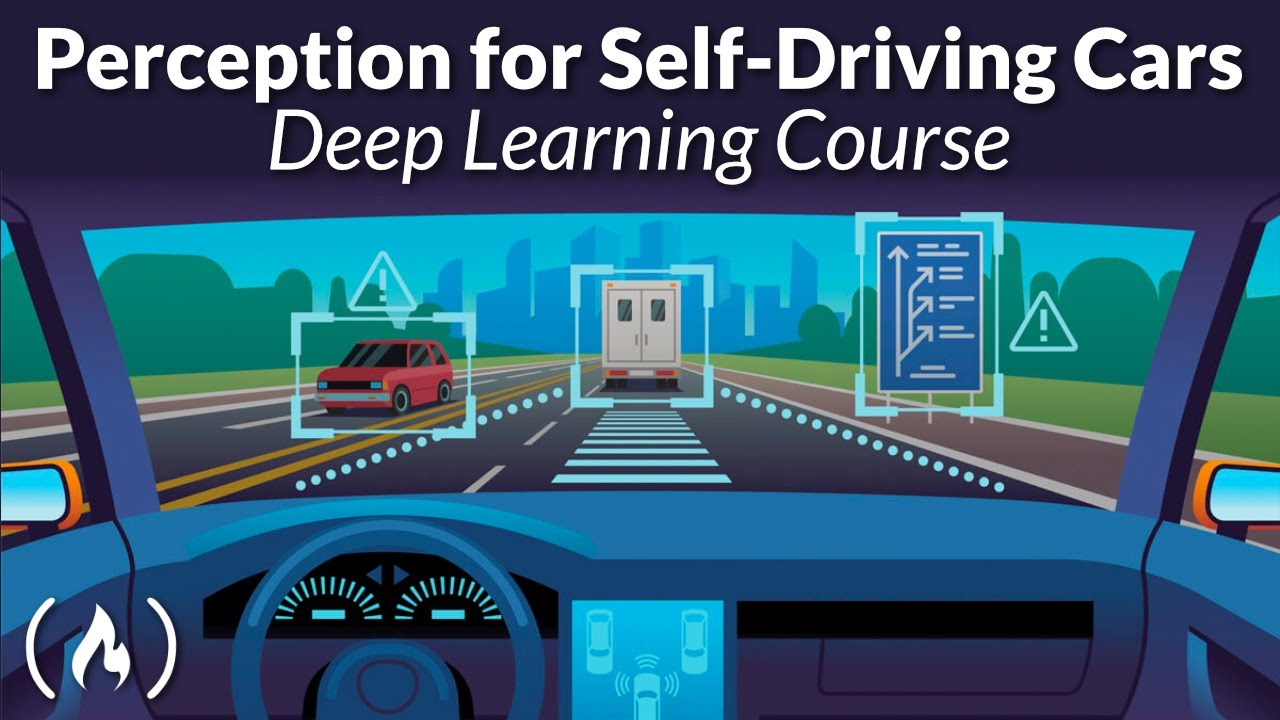

## Feature Importance

An informal approach to feature importance

In [24]:
def plot_violin_with_statistics(df, col1, col2, col3, col4):
    # Assuming the label column is named 'label'
    label_column = 'label'

    # The selected feature columns
    feature_columns = [col1, col2, col3, col4]

    # Set up the 2x2 plotting area
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

    # Flatten axes array for easier indexing
    axes = axes.flatten()

    # Define the colors for the violin plots
    palette = {0: "lightpink", 1: "lightskyblue"}

    # Plot each feature in the specified columns
    for i, feature in enumerate(feature_columns):
        sns.violinplot(x=label_column, y=feature, data=df, ax=axes[i], split=True, inner=None, hue=label_column, palette=palette, legend=False)

        # Overlay median, 25th percentile, and 75th percentile for both labels
        for label_value in df[label_column].unique():
            subset = df[df[label_column] == label_value][feature]
            median = subset.median()
            q25 = subset.quantile(0.25)
            q75 = subset.quantile(0.75)

            # Adjusting the plotting positions for better visibility
            axes[i].plot([label_value - 0.35, label_value + 0.35], [median, median], color='red', linestyle='-', linewidth=3)
            axes[i].plot([label_value - 0.35, label_value + 0.35], [q25, q25], color='blue', linestyle='--', linewidth=3)
            axes[i].plot([label_value - 0.35, label_value + 0.35], [q75, q75], color='green', linestyle='-.', linewidth=3)

        # Set the title and labels
        axes[i].set_title(f'Violin plot for {feature} by {label_column}')

        # Adding a custom legend for the percentiles to each subplot
        lines = [plt.Line2D([0], [0], color='red', linestyle='-', linewidth=3),
                 plt.Line2D([0], [0], color='blue', linestyle='--', linewidth=3),
                 plt.Line2D([0], [0], color='green', linestyle='-.', linewidth=3)]
        labels = ['Median (50th percentile)', '25th percentile', '75th percentile']
        axes[i].legend(lines, labels, loc='upper right')

    # Adjust layout for better readability
    plt.tight_layout()
    plt.show()



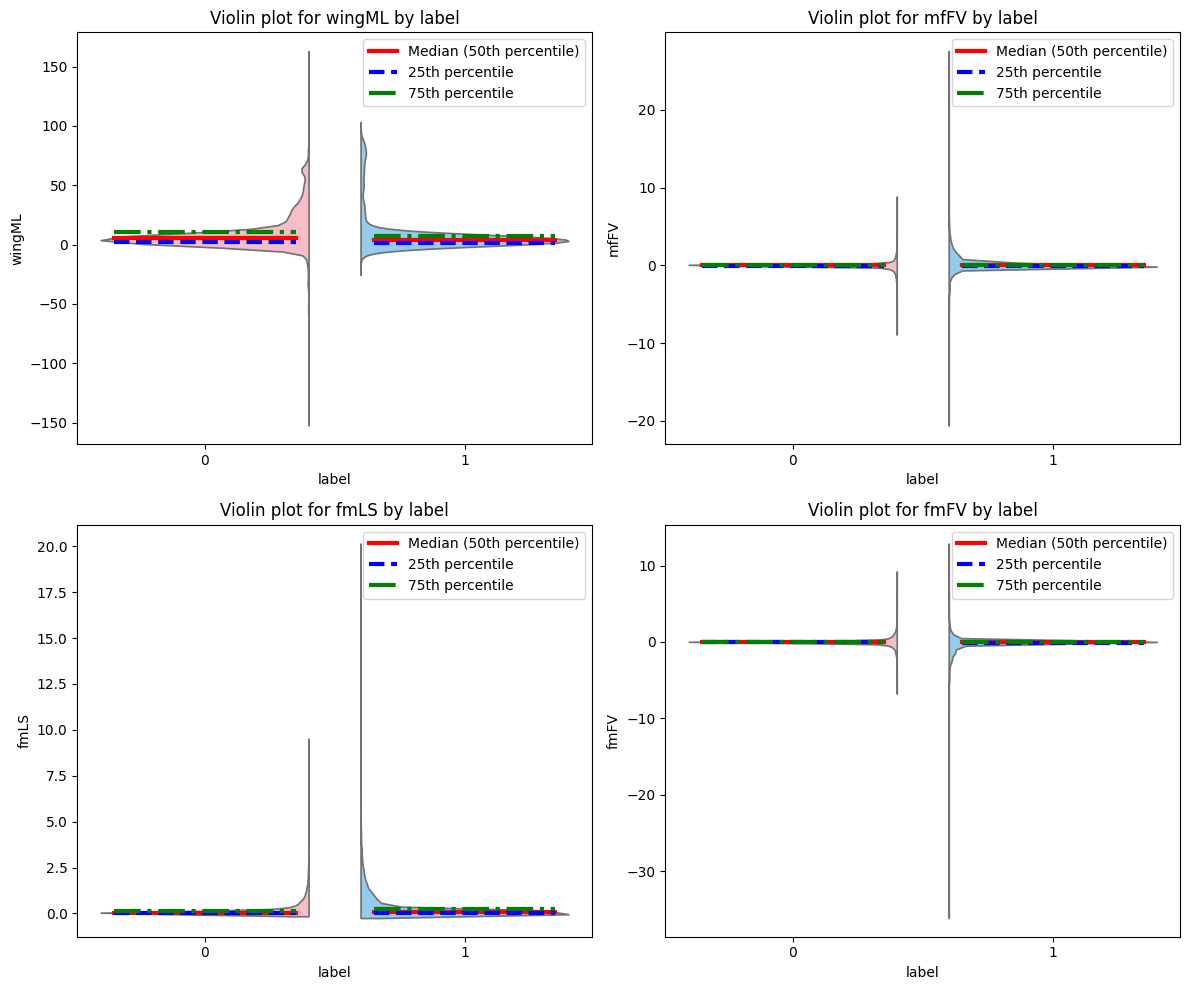

In [25]:
plot_violin_with_statistics(training_set,'wingML','mfFV','fmLS','fmFV')

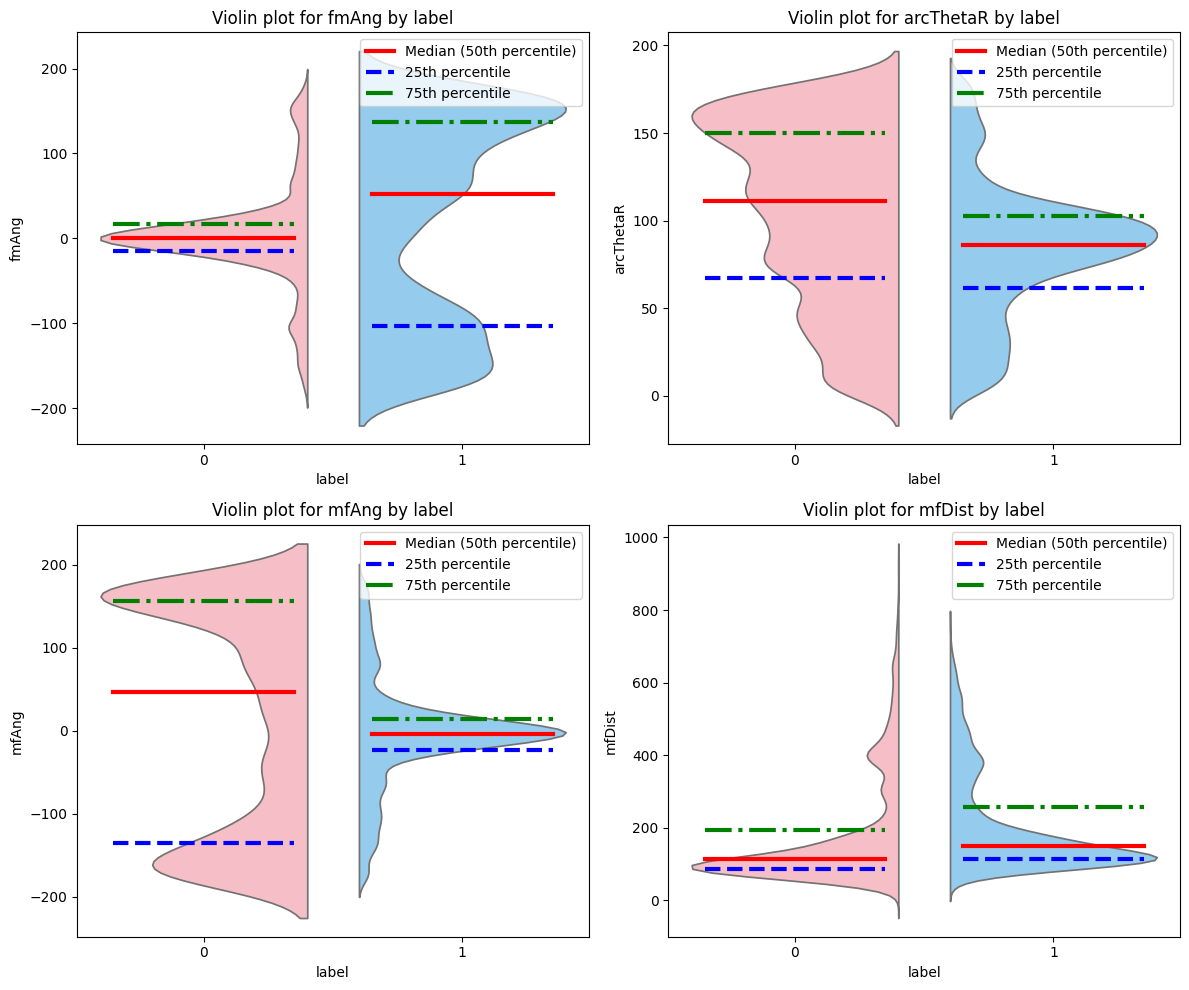

In [26]:
plot_violin_with_statistics(training_set,'fmAng','arcThetaR','mfAng','mfDist')

## Applying machine learning models

## Model 1: Support Vector Machine

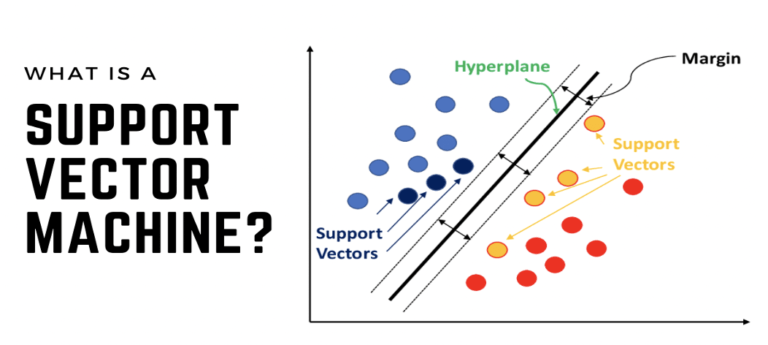

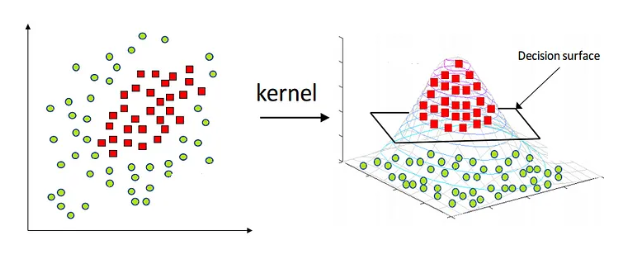

## Model 2: Random Forest (from the family of Ensemble Learners)*italicized text*

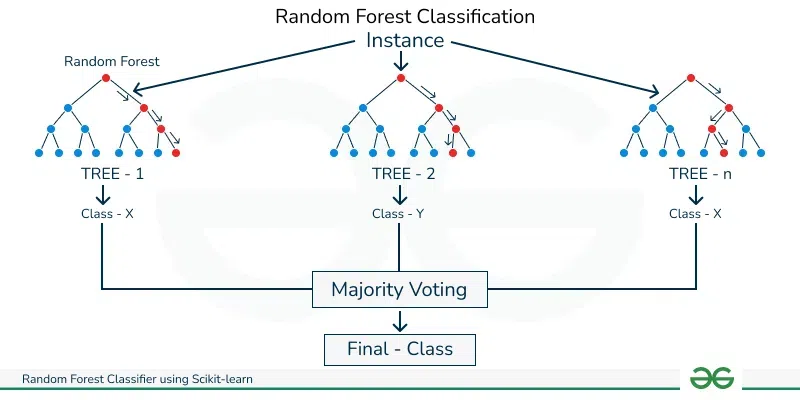

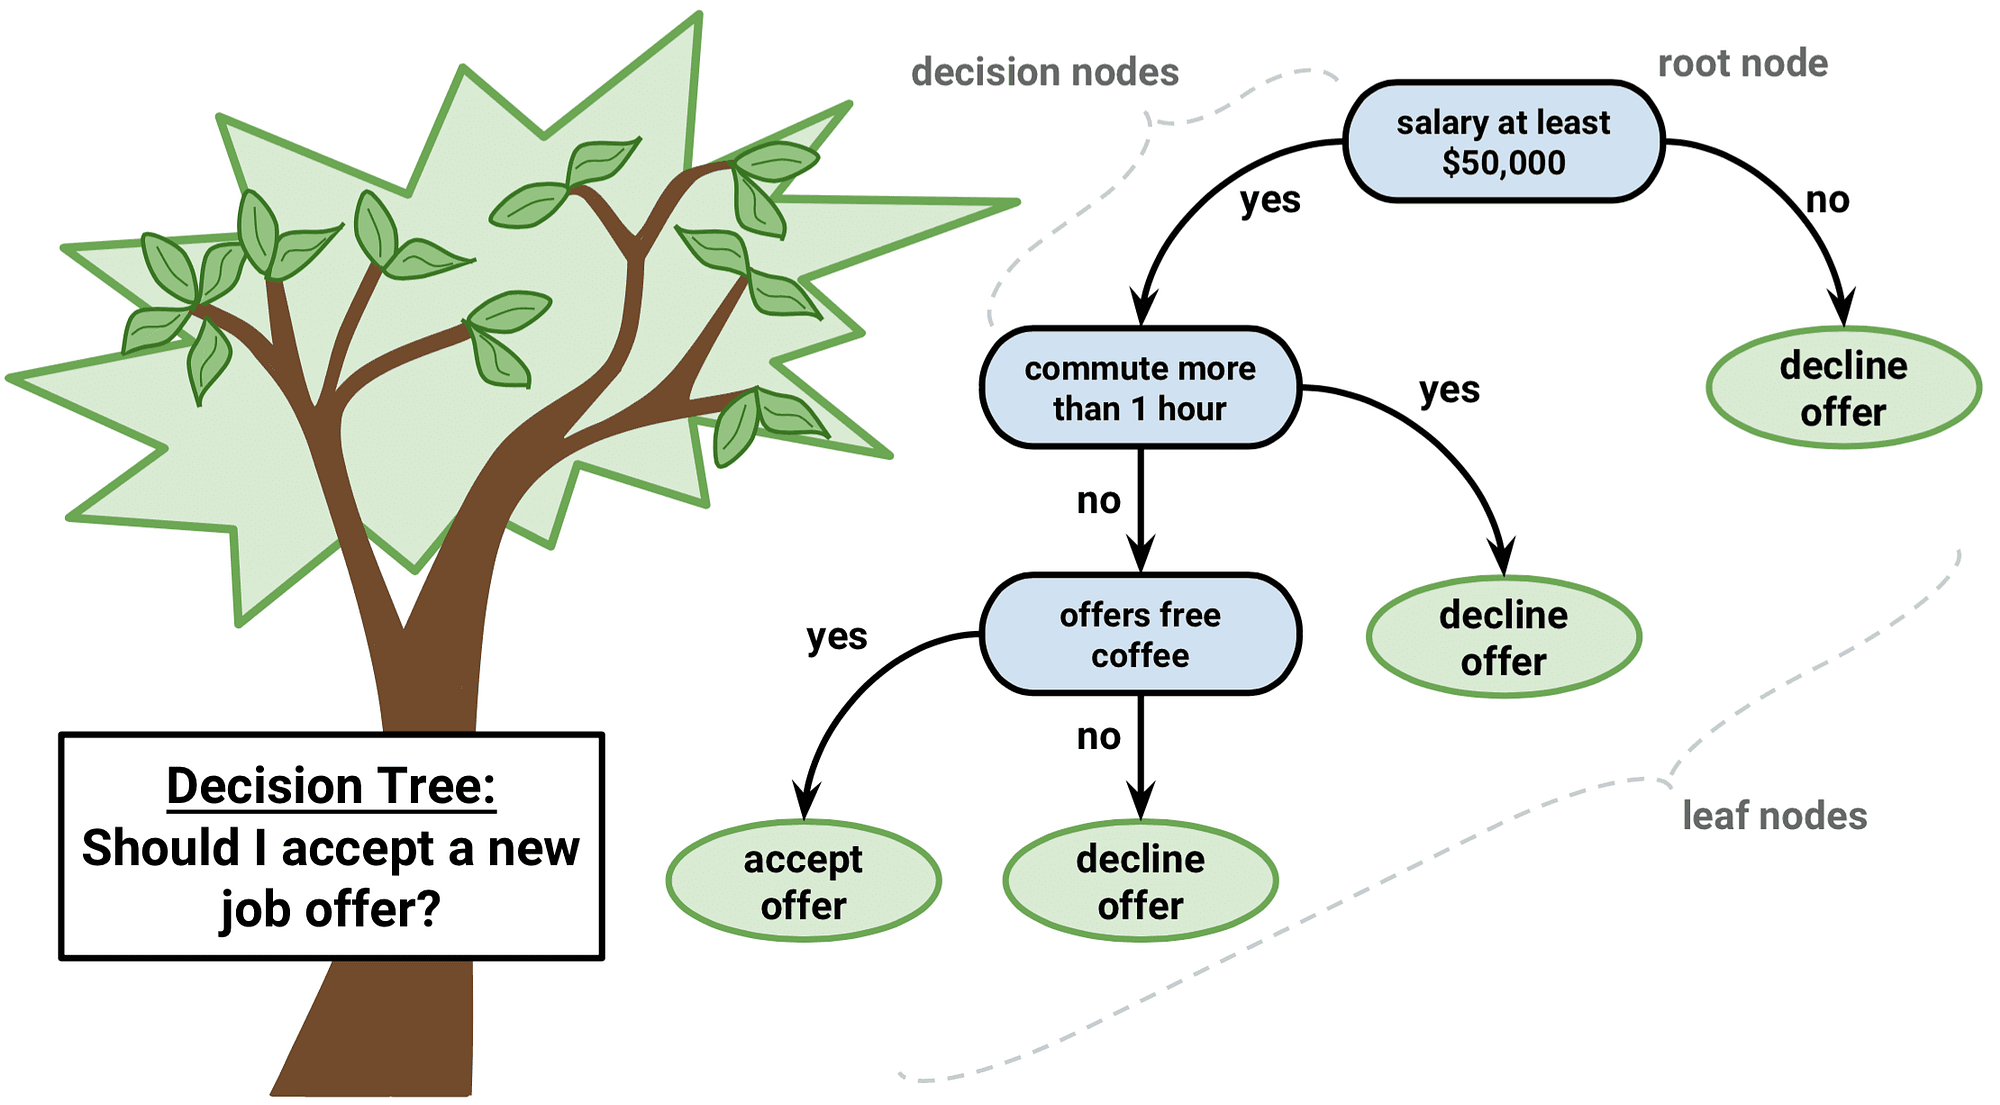

## Neural Networks

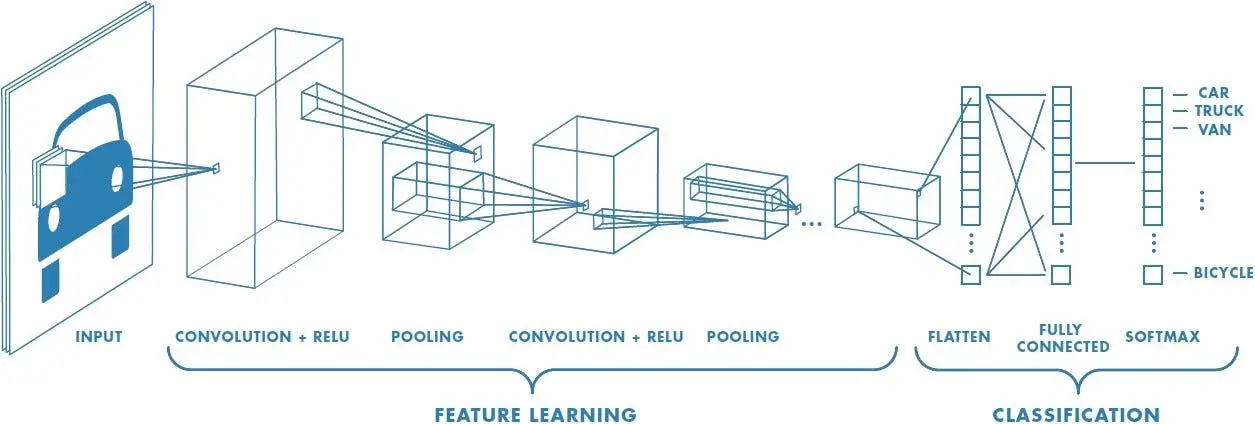

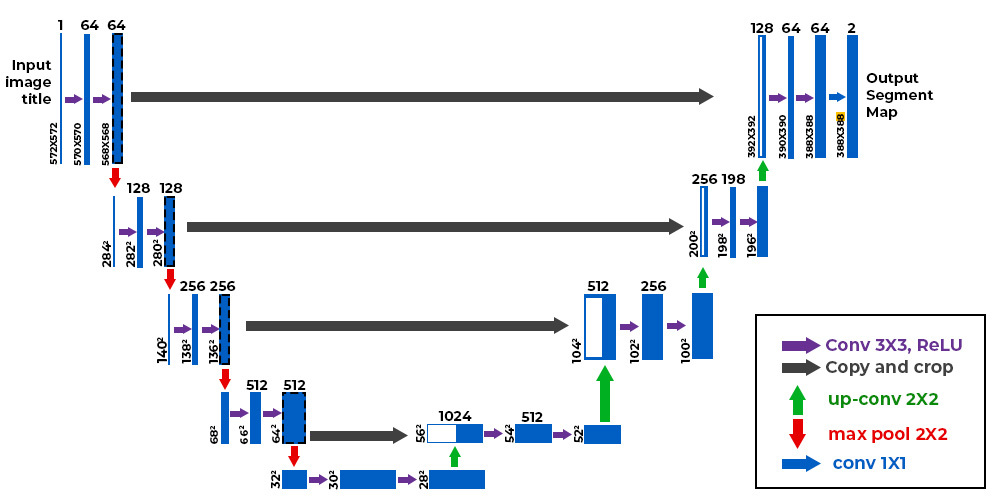

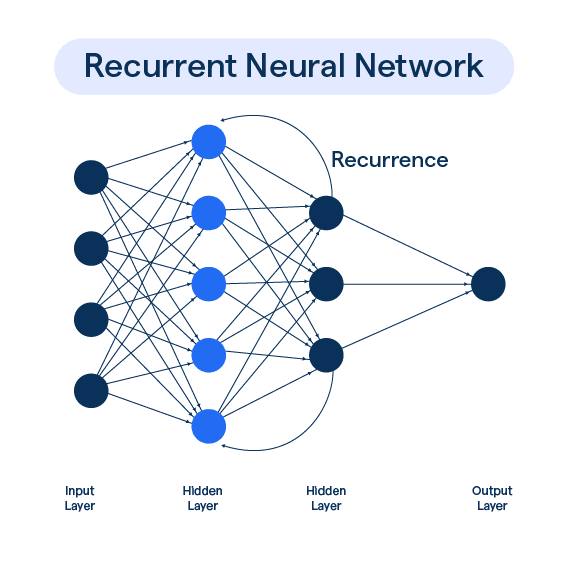

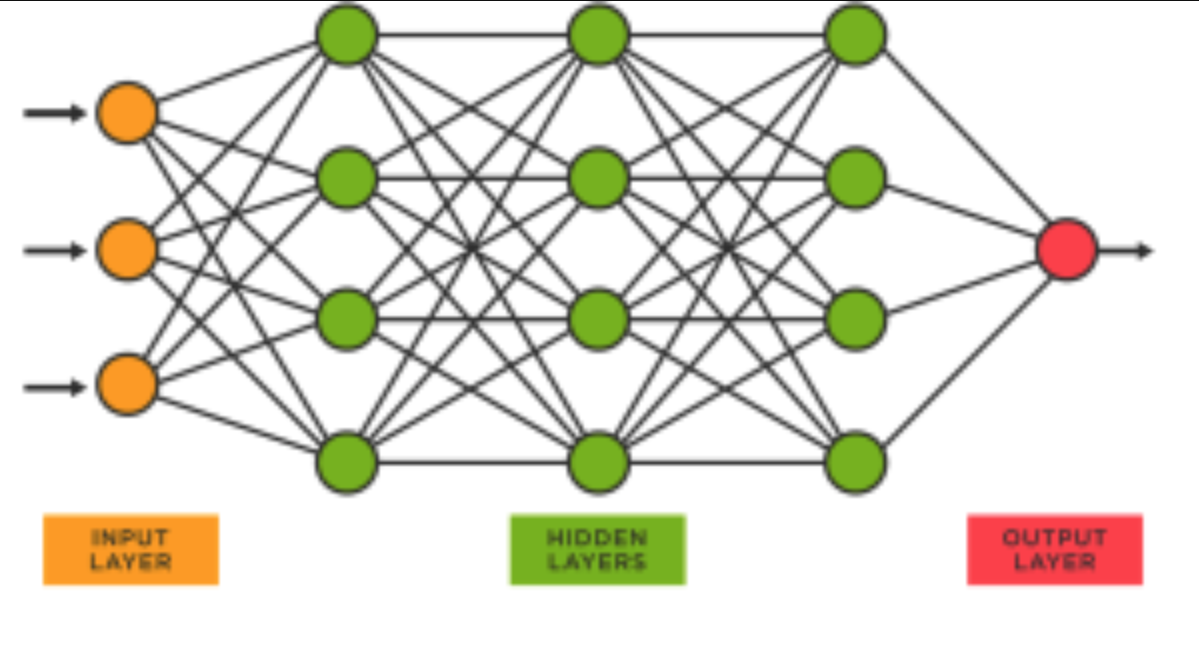

### Scaling Factor


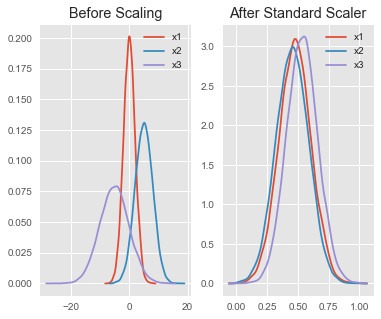

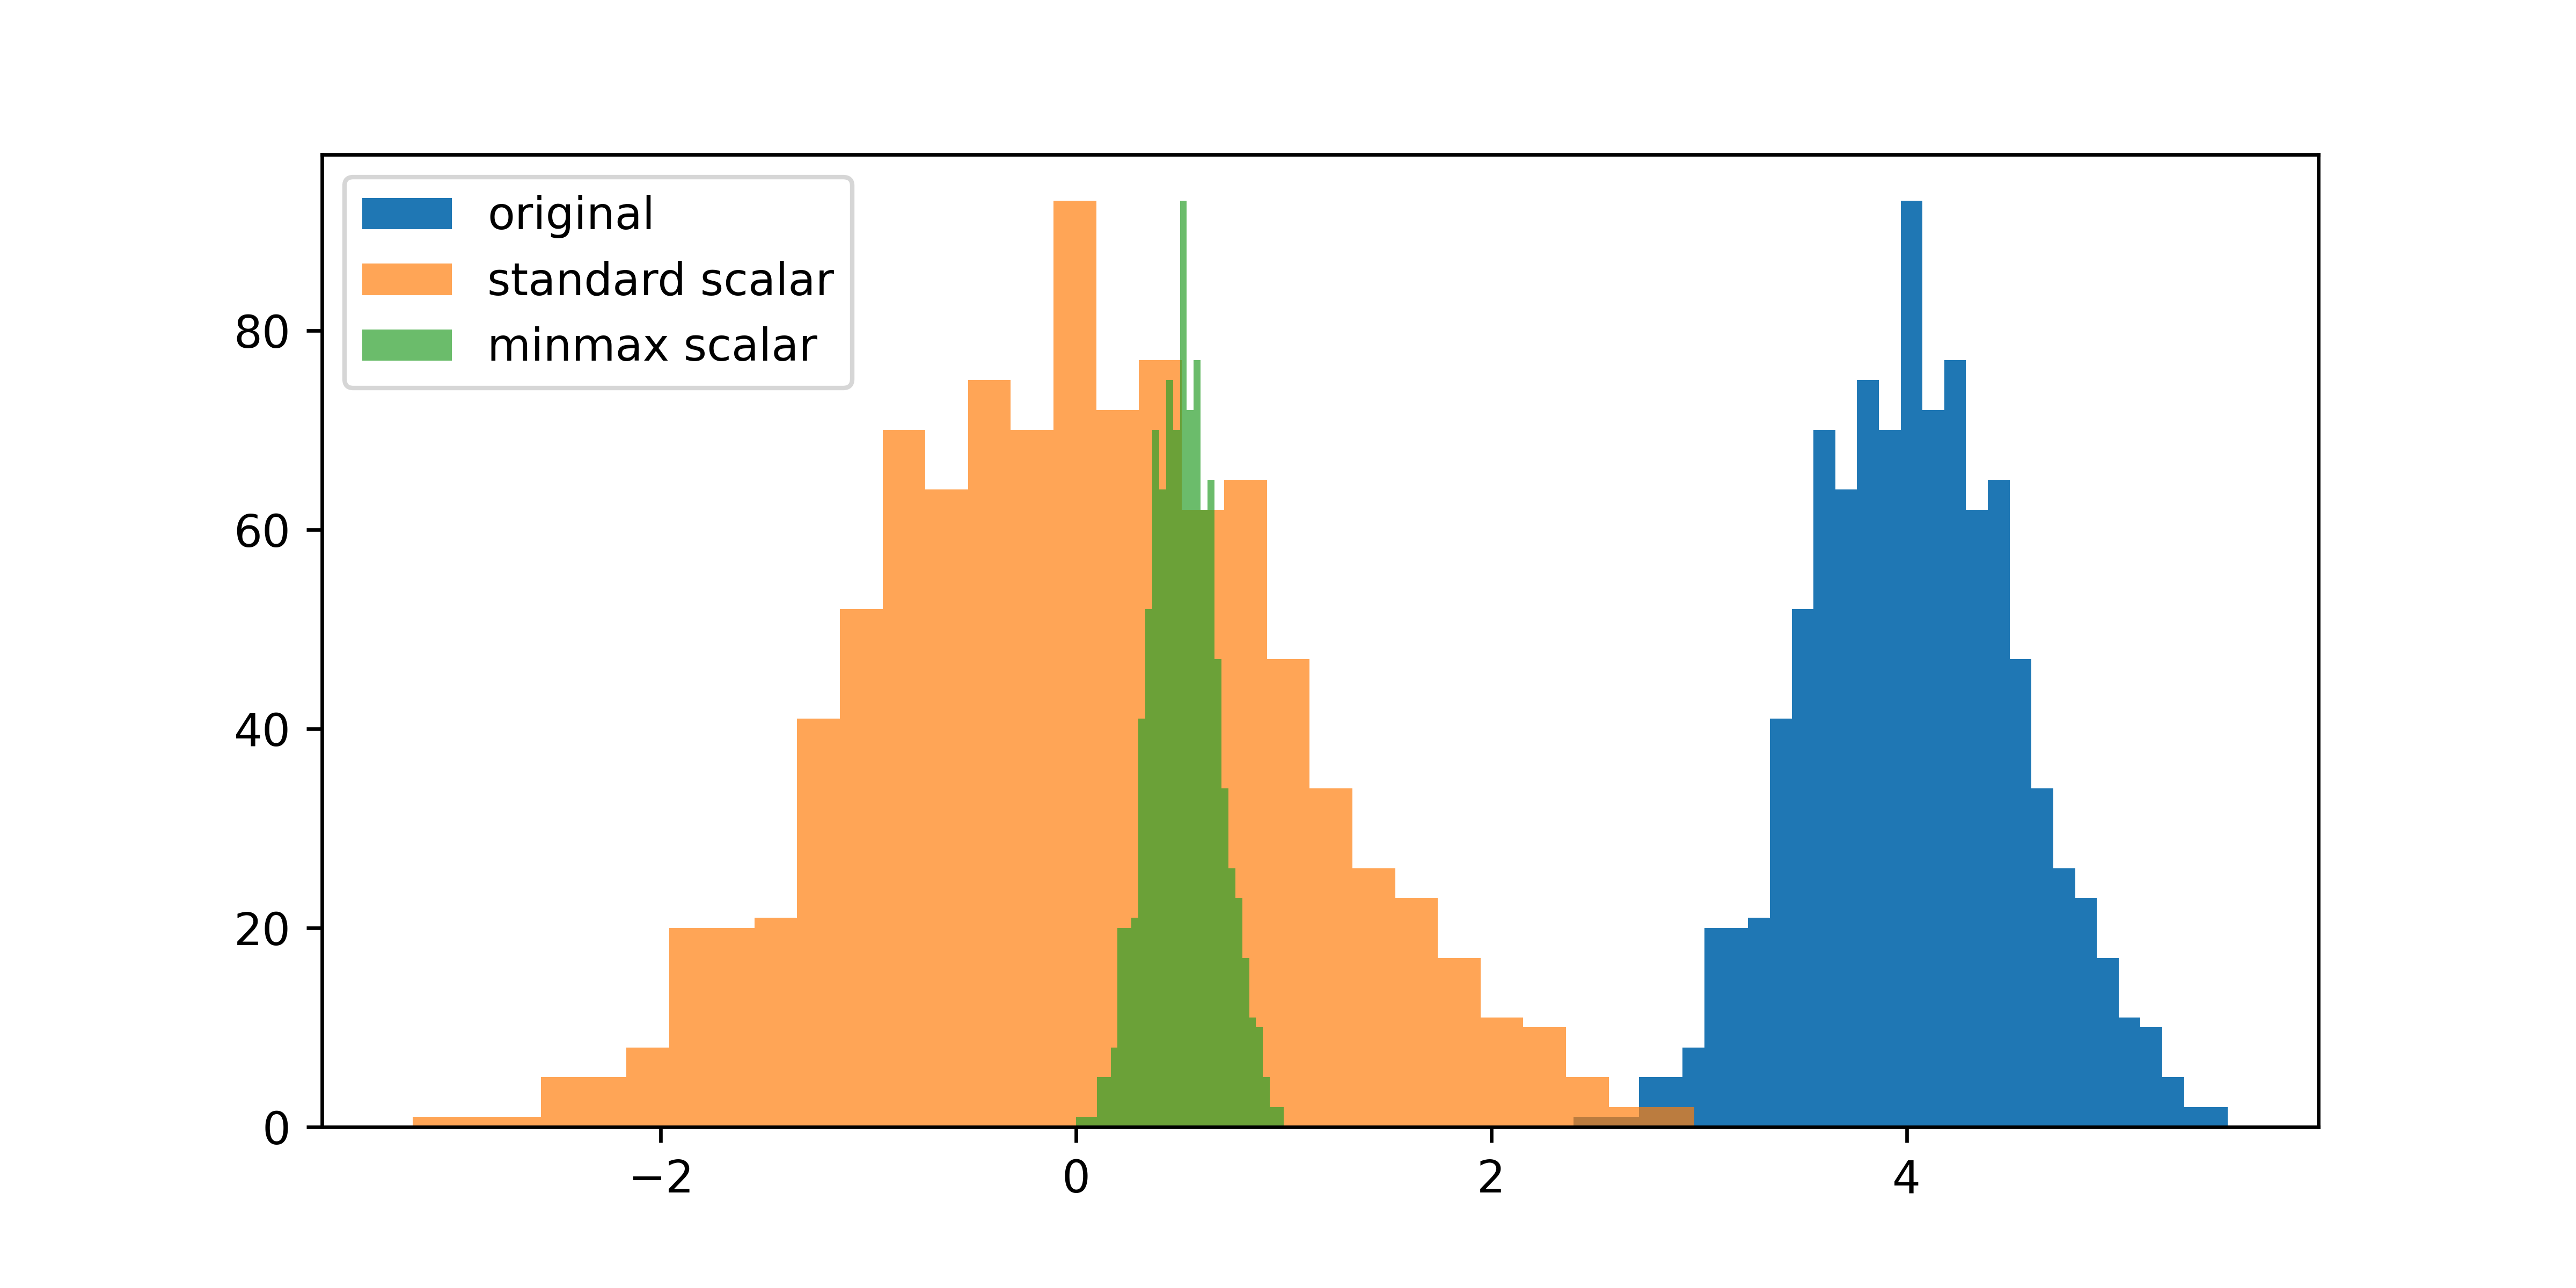

## Applying Machine Learning Models

#### SVM (with RBF implementation)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


def build_and_train_svm(df, kernel='rbf', C=1.0, gamma='scale', test_size=0.3, random_state=None):
    # Separate features and labels
    X = df.iloc[:, :-1]  # First 25 columns are features
    y = df.iloc[:, -1]   # Last column is the label

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and train the SVM model
    svm_model = SVC(kernel=kernel, C=C, gamma=gamma, random_state=random_state)
    svm_model.fit(X_train, y_train)

    # Make predictions
    y_pred = svm_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", cm)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return svm_model, scaler  # Return both the model and the scaler




Accuracy: 0.8428
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1550
           1       0.83      0.88      0.85      1650

    accuracy                           0.84      3200
   macro avg       0.84      0.84      0.84      3200
weighted avg       0.84      0.84      0.84      3200

Confusion Matrix:
 [[1243  307]
 [ 196 1454]]


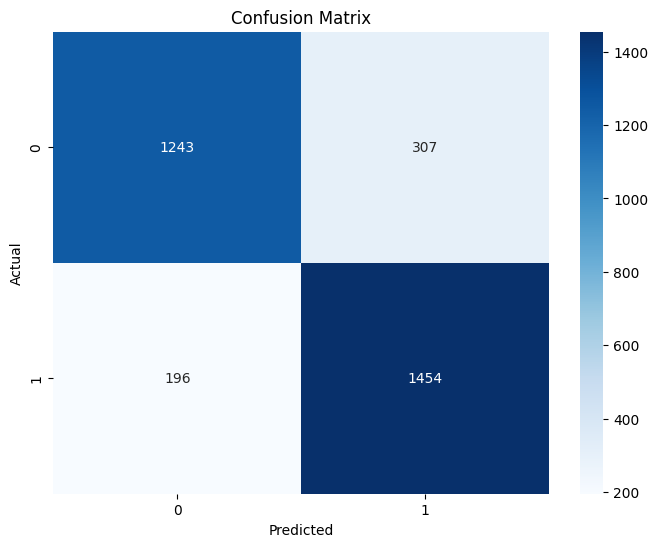

In [29]:
svm_mod, svm_scale = build_and_train_svm(training_set, kernel='rbf', C=1.0, gamma='scale', test_size=0.2, random_state=1003)

In [30]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def test_svm_model(svm_model, scaler, new_df):
    # Separate features and labels in the new dataset
    X_new = new_df.iloc[:, :-1]  # First 25 columns are features
    y_new = new_df.iloc[:, -1]   # Last column is the label

    # Scale the features using the scaler fitted on the training data
    X_new_scaled = scaler.transform(X_new)

    # Make predictions using the trained SVM model
    y_pred = svm_model.predict(X_new_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_new, y_pred)
    report = classification_report(y_new, y_pred)

    # Generate and display the confusion matrix
    cm = confusion_matrix(y_new, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print(f"Accuracy on the new dataset: {accuracy:.4f}")
    print("Classification Report:\n", report)

    return accuracy, report, cm  # Returning the confusion matrix as well

# Example usage
# new_df = pd.DataFrame(...)  # New dataset for testing
# accuracy, report, cm = test_svm_model(svm_model, scaler, new_df)



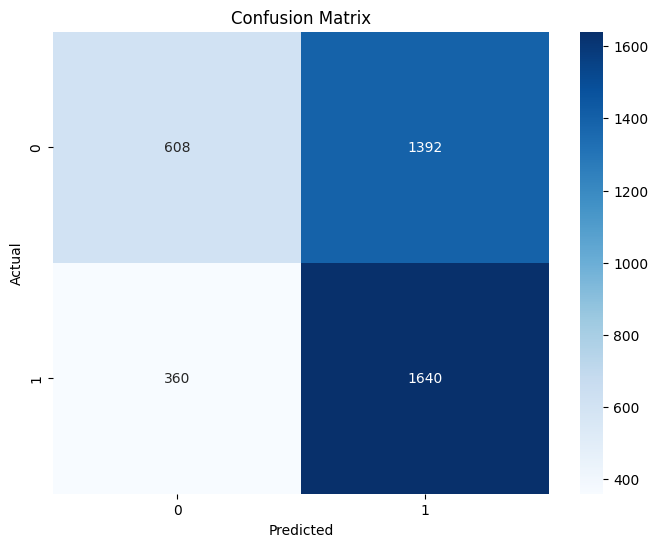

Accuracy on the new dataset: 0.5620
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.30      0.41      2000
           1       0.54      0.82      0.65      2000

    accuracy                           0.56      4000
   macro avg       0.58      0.56      0.53      4000
weighted avg       0.58      0.56      0.53      4000



In [31]:
acc, rep, cm = test_svm_model(svm_mod, svm_scale, testing_set)

### Random forest implementation

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def build_and_train_rf(df, n_estimators=1000, max_depth=None, test_size=0.2, random_state=None):
    # Separate features and labels
    X = df.iloc[:, :-1]  # First 25 columns are features
    y = df.iloc[:, -1]   # Last column is the label

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and train the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Generate and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Print accuracy and classification report
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)

    return rf_model, scaler  # Return both the model and the scaler

# Example usage
# df = pd.Data


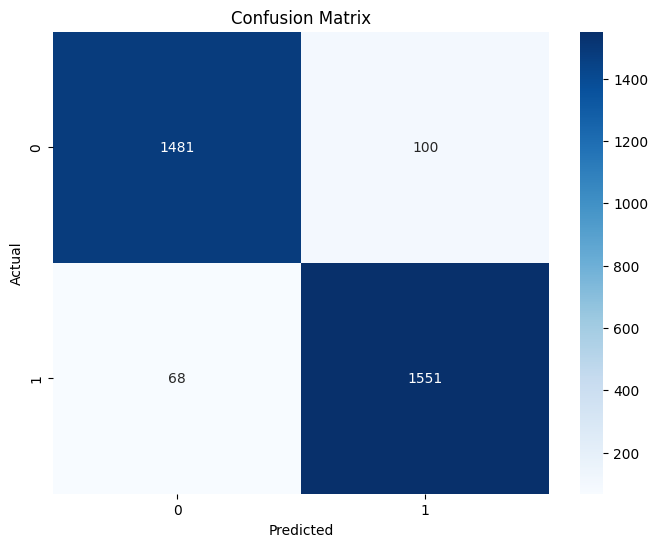

Accuracy: 0.9475
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1581
           1       0.94      0.96      0.95      1619

    accuracy                           0.95      3200
   macro avg       0.95      0.95      0.95      3200
weighted avg       0.95      0.95      0.95      3200



In [33]:
rf_model, scaler = build_and_train_rf(training_set, n_estimators=100, max_depth=None, test_size=0.2, random_state=1004)

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def build_and_train_rf(train_df, test_df, n_estimators=1000, max_depth=None, random_state=None):
    # Separate features and labels for training data
    X_train = train_df.iloc[:, :-1]  # All columns except the last are features
    y_train = train_df.iloc[:, -1]   # The last column is the label

    # Separate features and labels for testing data
    X_test = test_df.iloc[:, :-1]
    y_test = test_df.iloc[:, -1]

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and train the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Generate and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Print accuracy and classification report
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)

    return rf_model, scaler  # Return both the model and the scaler

# Example usage:
# train_df = pd.DataFrame(...)  # Your training DataFrame
# test_df = pd.DataFrame(...)   # Your testing DataFrame
# rf_model, scaler = build_and_train_rf(train_df, test_df, n_estimators=1000, max_depth=None, random_state=42)


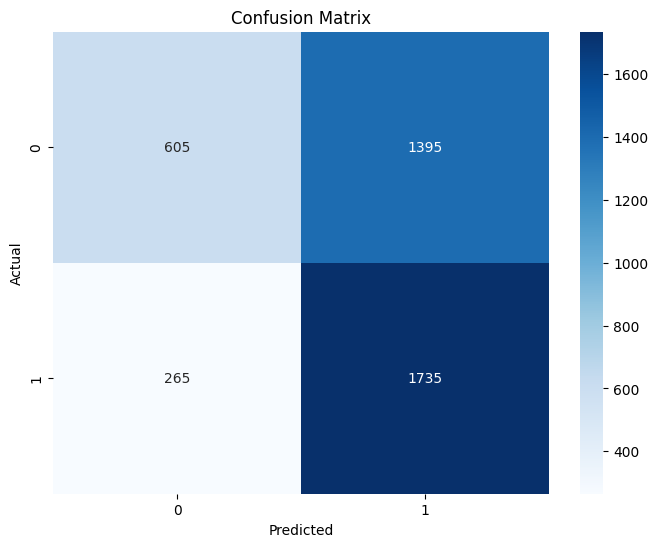

Accuracy: 0.5850
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.30      0.42      2000
           1       0.55      0.87      0.68      2000

    accuracy                           0.58      4000
   macro avg       0.62      0.58      0.55      4000
weighted avg       0.62      0.58      0.55      4000



In [35]:
rf_model, scaler = build_and_train_rf(training_set, testing_set, n_estimators=100, max_depth=None, random_state=1004)

# In the remaining time, build a neural network classifier

In [199]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network  import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from skopt.space import Real, Integer, Categorical 
from skopt.utils import use_named_args
from skopt import gp_minimize

def optimize_params_nn(train_df, test_df):
    # Separate features and labels for training data
    X_train = train_df.iloc[:, :-1]  # All columns except the last are features
    y_train = train_df.iloc[:, -1]   # The last column is the label

    # Separate features and labels for testing data
    X_test = test_df.iloc[:, :-1]
    y_test = test_df.iloc[:, -1]

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    nn = MLPClassifier(random_state=0)

    # find optimal parameters
    space=[
      Categorical(['tanh','relu'],name='activation'),
      Integer(3,6,name='n_hidden_layer'),
      Integer(1,20,name='n_neurons_per_layer'),
      Real(1e-10,1e2,name='alpha')]

    @use_named_args(space)

    def objective(**params):
        n_neurons=params['n_neurons_per_layer']
        n_layers=params['n_hidden_layer']

    # create the hidden layers as a tuple with length n_layers and n_neurons per layer
        params['hidden_layer_sizes']=(n_neurons,)*n_layers

    # the parameters are deleted to avoid an error from the MLPClassifier
        params.pop('n_neurons_per_layer')
        params.pop('n_hidden_layer')

        nn.set_params(**params)

        return (numpy.mean(1-cross_val_score(nn, X_train, y_train, cv=10, n_jobs=-1,
                                      scoring="accuracy")))

    res_gp = gp_minimize(objective, space, n_calls=100, random_state=1, n_jobs=-1)

    print(res_gp)
    return res_gp['x']


def build_and_train_nn(train_df, test_df, regTerm, activation, hiddenLayerSizes):
    # Separate features and labels for training data
    X_train = train_df.iloc[:, :-1]  # All columns except the last are features
    y_train = train_df.iloc[:, -1]   # The last column is the label

    # Separate features and labels for testing data
    X_test = test_df.iloc[:, :-1]
    y_test = test_df.iloc[:, -1]

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and train the Neural Network model
    clf = MLPClassifier(solver='lbfgs', alpha=regTerm, activation=activation, hidden_layer_sizes=hiddenLayerSizes, max_iter=5000, random_state=1, early_stopping=True, validation_fraction=.2, learning_rate='adaptive')
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Generate and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Print accuracy and classification report
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)

    return rf_model, scaler

def build_and_train_nn_adam(train_df, test_df, regTerm, activation, hiddenLayerSizes):
    # Separate features and labels for training data
    X_train = train_df.iloc[:, :-1]  # All columns except the last are features
    y_train = train_df.iloc[:, -1]   # The last column is the label

    # Separate features and labels for testing data
    X_test = test_df.iloc[:, :-1]
    y_test = test_df.iloc[:, -1]

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and train the Neural Network model
    #clf = MLPClassifier(solver='adam', alpha=regTerm, activation=activation, hidden_layer_sizes=hiddenLayerSizes, max_iter=20, random_state=1, early_stopping=True, validation_fraction=.1)
    clf = MLPClassifier(hidden_layer_sizes=(10,10,10), random_state=72)
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Generate and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Print accuracy and classification report
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)

    return rf_model, scaler

In [189]:
bestParams = optimize_params_nn(training_set, testing_set)

          fun: 0.12162500000000001
            x: [np.str_('tanh'), np.int64(3), np.int64(19), 0.08760335682933895]
    func_vals: [ 5.000e-01  5.000e-01 ...  5.000e-01  2.043e-01]
      x_iters: [['relu', np.int64(6), np.int64(3), 99.90405153241458], ['tanh', np.int64(4), np.int64(8), 66.97460368038104], ['relu', np.int64(6), np.int64(7), 52.454815957334695], ['tanh', np.int64(4), np.int64(11), 91.39620245793192], ['tanh', np.int64(4), np.int64(19), 77.83892363367553], ['relu', np.int64(5), np.int64(3), 51.8152548942371], ['relu', np.int64(5), np.int64(17), 27.304997421747437], ['tanh', np.int64(5), np.int64(12), 67.16540974224628], ['tanh', np.int64(4), np.int64(7), 14.212013547581485], ['relu', np.int64(4), np.int64(2), 62.40299864777294], [np.str_('relu'), np.int64(3), np.int64(20), 1e-10], [np.str_('tanh'), np.int64(3), np.int64(1), 100.0], [np.str_('tanh'), np.int64(6), np.int64(20), 0.21417795560859557], [np.str_('tanh'), np.int64(6), np.int64(2), 96.30259413384488], [np.str_('t

In [175]:
print(bestParams)

[np.str_('tanh'), np.int64(2), np.int64(13), 1e-10]


d:\Quantify Natural Behavior Course\Python Test\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


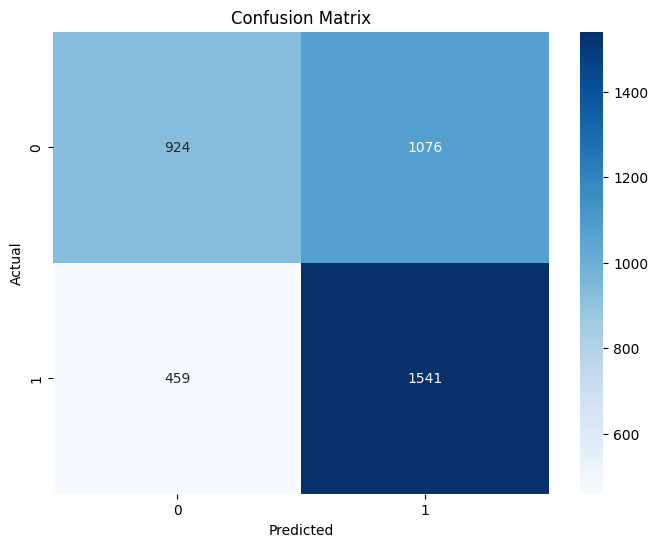

Accuracy: 0.6162
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.46      0.55      2000
           1       0.59      0.77      0.67      2000

    accuracy                           0.62      4000
   macro avg       0.63      0.62      0.61      4000
weighted avg       0.63      0.62      0.61      4000



In [190]:
#nn_model, scaler = build_and_train_nn_adam(training_set, testing_set, bestParams[-1], bestParams[0], tuple(bestParams[1:-1]))
#
 #nn_model, scaler = build_and_train_nn_adam(training_set, testing_set, .01, 'tanh', (2, 20))
#.01 20 2

#With The NN Parameters They Assigned

d:\Quantify Natural Behavior Course\Python Test\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


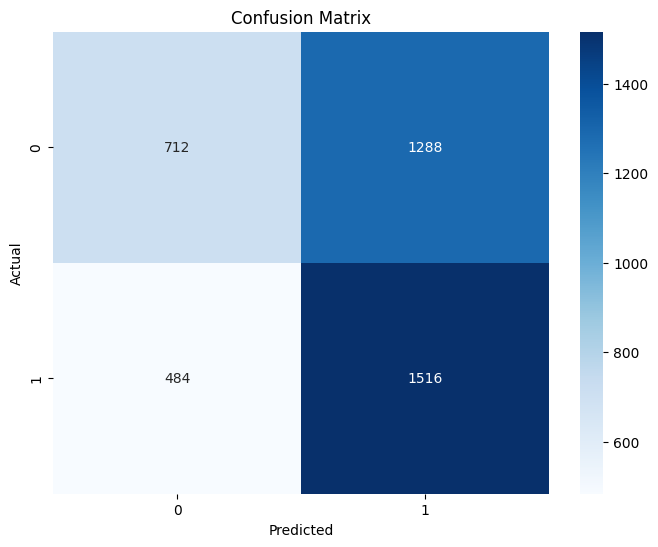

Accuracy: 0.5570
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.36      0.45      2000
           1       0.54      0.76      0.63      2000

    accuracy                           0.56      4000
   macro avg       0.57      0.56      0.54      4000
weighted avg       0.57      0.56      0.54      4000



In [200]:
nn_model, scaler = build_and_train_nn_adam(training_set, testing_set, 1e-4, 'tanh', (10,10,10))


d:\Quantify Natural Behavior Course\Python Test\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('relu'), np.int64(4), np.int64(20), 1e-10] before, using random point ['relu', np.int64(6), np.int64(14), 31.73341501645485]
  warnings.warn(
d:\Quantify Natural Behavior Course\Python Test\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('relu'), np.int64(4), np.int64(20), 1e-10] before, using random point ['tanh', np.int64(5), np.int64(19), 95.15717522684618]
  warnings.warn(
d:\Quantify Natural Behavior Course\Python Test\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('relu'), np.int64(4), np.int64(20), 1e-10] before, using random point ['relu', np.int64(4), np.int64(9), 12.575323030471328]
  warnings.warn(


          fun: 0.1661875
            x: [np.str_('relu'), np.int64(4), np.int64(14), 0.2736323439079437]
    func_vals: [ 5.000e-01  2.079e-01 ...  1.840e-01  1.819e-01]
      x_iters: [['relu', np.int64(6), np.int64(17), 84.72517387842784], ['relu', np.int64(4), np.int64(7), 5.671297731838648], ['tanh', np.int64(4), np.int64(16), 47.997717237557744], ['tanh', np.int64(6), np.int64(7), 64.81718720515491], ['tanh', np.int64(6), np.int64(4), 87.00872583585665], ['tanh', np.int64(5), np.int64(11), 67.88795301192815], ['relu', np.int64(5), np.int64(11), 75.86156243225987], ['tanh', np.int64(4), np.int64(5), 73.69181771292213], ['tanh', np.int64(3), np.int64(7), 14.967486718453351], ['tanh', np.int64(4), np.int64(18), 44.99499899117777], [np.str_('relu'), np.int64(6), np.int64(20), 1e-10], [np.str_('relu'), np.int64(3), np.int64(1), 1e-10], [np.str_('tanh'), np.int64(4), np.int64(3), 1e-10], [np.str_('relu'), np.int64(5), np.int64(3), 1.3441520747522389], [np.str_('tanh'), np.int64(6), np.i

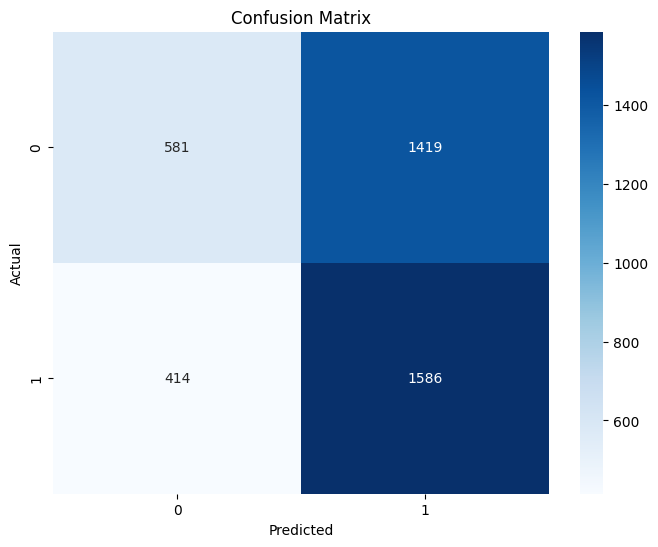

Accuracy: 0.5417
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.29      0.39      2000
           1       0.53      0.79      0.63      2000

    accuracy                           0.54      4000
   macro avg       0.56      0.54      0.51      4000
weighted avg       0.56      0.54      0.51      4000



In [179]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.neural_network  import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from skopt.space import Real, Integer, Categorical 
from skopt.utils import use_named_args
from skopt import gp_minimize

def optimize_params_nn_givenParams(train_df, test_df):
    # Separate features and labels for training data
    X_train = train_df.iloc[:, :-1]  # All columns except the last are features
    y_train = train_df.iloc[:, -1]   # The last column is the label

    # Separate features and labels for testing data
    X_test = test_df.iloc[:, :-1]
    y_test = test_df.iloc[:, -1]

    # Feature scaling
    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    nn = MLPClassifier(random_state=0)

    # find optimal parameters
    space=[
      Categorical(['tanh','relu'],name='activation'),
      Integer(3,6,name='n_hidden_layer'),
      Integer(1,20,name='n_neurons_per_layer'),
      Real(1e-10,1e2,name='alpha')]

    @use_named_args(space)

    def objective(**params):
        n_neurons=params['n_neurons_per_layer']
        n_layers=params['n_hidden_layer']

    # create the hidden layers as a tuple with length n_layers and n_neurons per layer
        params['hidden_layer_sizes']=(n_neurons,)*n_layers

    # the parameters are deleted to avoid an error from the MLPClassifier
        params.pop('n_neurons_per_layer')
        params.pop('n_hidden_layer')

        nn.set_params(**params)

        return (numpy.mean(1-cross_val_score(nn, X_train, y_train, cv=5, n_jobs=-1,
                                      scoring="accuracy")))

    res_gp = gp_minimize(objective, space, n_calls=100, random_state=0, n_jobs=-1)

    print(res_gp)
    return res_gp['x']

bestParams = optimize_params_nn_givenParams(training_set, testing_set)
nn_model, scaler = build_and_train_nn(training_set, testing_set, bestParams[-1], bestParams[0], tuple(bestParams[1:-1]))